# SOFE4620 Object Recognition in Images
## Group 3
##  April 05, 2024

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.regularizers import l2
import visualkeras
import pydot
import graphviz
from tensorflow.keras.utils import plot_model

import pandas as pd

print(f'Tensorflow ver: {tf.__version__}')
print('Succesfully imported libraries')

Tensorflow ver: 2.10.1
Succesfully imported libraries


In [2]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


# Data Preprocessing

In [4]:
# import CIFAR-10 dataset from keras
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=25)

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Image of: ship


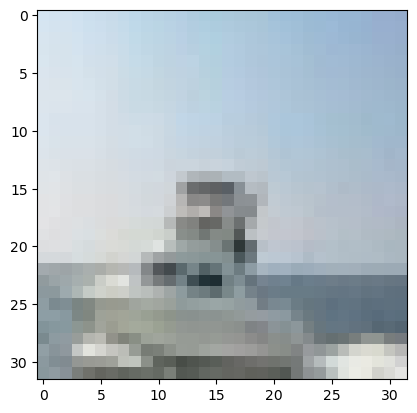

In [5]:
print(f'Image of: {label_names[y_train[100][0]]}')
plt.figure()
plt.imshow(X_train[100])
#plt.colorbar()

In [6]:
# Normalize the image pixels by dividing by 255
X_train_normalized = X_train_new / 255
X_val_normalized = X_val / 255
X_test_normalized = X_test / 255

# Apply one-hot encoding to the numberical labels (0-9 for CIFAR-10)
# This transforms the numerical labels into a binary matrix representation --> more suitable for classification models,
# especially with neural networks

y_train_ohe = to_categorical(y_train_new, num_classes=10)
y_val_ohe = to_categorical(y_val, num_classes=10)
y_test_ohe = to_categorical(y_test, num_classes=10)

print(f'X_train shape: {X_train_normalized.shape}')
print(f'y_train shape: {y_train_ohe.shape}')
print(f'X_val shape: {X_val_normalized.shape}')
print(f'y_val shape: {y_val_ohe.shape}')
print(f'X_test shape: {X_test_normalized.shape}')
print(f'y_test shape: {y_test_ohe.shape}')

# X_train and X_test are in the format (# of samples, height, width, channel)
# y_train and y_test are in the format (# of samples, # of labels (in this dataset it's 1 label))

X_train shape: (42500, 32, 32, 3)
y_train shape: (42500, 10)
X_val shape: (7500, 32, 32, 3)
y_val shape: (7500, 10)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


# Model Development

## Model V1

In [43]:
'''
Model V1 is a basic model that consists of just a few layers aimed to process the CIFAR-10 image data.
Conv2D Layer: 2 dimensional layer that applies 32 convlutional filters (of size 4x4) to the input images, used to extract features
MaxPooling2D layer: reduces the spatial dimensions (height and width) of input feature maps by taking max value over a 2x2 pooling window
Flatten layer: converts multi-dimensional feature maps to a one-dimensional vector for the Dense layer
Dense layer(128 units): fully connected layer that allows the model to learn non-linear combinations of features extracted by the conv2d and pooling layers
Dense layer(10 units): output layer of the model, with the 10 units corresponding to the 10 labels in the CIFAR-10 dataset
Loss: categorical cross-entropy is a loss function suitable for multi-class classification problems, it measures the distance between predicted probability distribution and the true distribution
Optimizer: Adam optimizer is an extension to the stochastic gradient descent with an adaptive learning rate
'''

model_v1 = Sequential(name="model_v1")
model_v1.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model_v1.add(MaxPooling2D(pool_size = (2,2)))
model_v1.add(Flatten())
model_v1.add(Dense(128, activation ='relu'))
model_v1.add(Dense(10, activation ='softmax'))
model_v1.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])
model_v1.summary()

Model: "model_v1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               802944    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 805,802
Trainable params: 805,802
Non-trainable params: 0
____________________________________________________

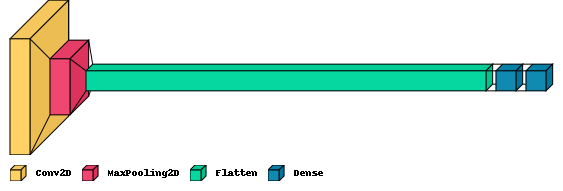

In [44]:
visualkeras.layered_view(model_v1, legend=True)

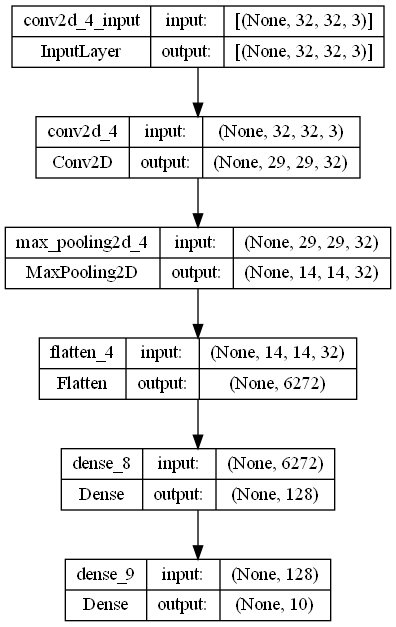

In [45]:
tf.keras.utils.plot_model(model_v1, to_file='model_test.png', show_shapes=True, show_layer_names=True)

In [53]:
%%time
history_v1 = model_v1.fit(X_train_normalized, y_train_ohe, epochs = 30, verbose=1,validation_data=(X_val_normalized, y_val_ohe))

Epoch 1/30
1329/1329 [==============================] - 3s 2ms/step - loss: 1.4625 - accuracy: 0.4800 - val_loss: 1.2950 - val_accuracy: 0.5455
Epoch 2/30
1329/1329 [==============================] - 4s 3ms/step - loss: 1.1612 - accuracy: 0.5926 - val_loss: 1.1787 - val_accuracy: 0.5845
Epoch 3/30
1329/1329 [==============================] - 4s 3ms/step - loss: 1.0076 - accuracy: 0.6473 - val_loss: 1.0923 - val_accuracy: 0.6177
Epoch 4/30
1329/1329 [==============================] - 4s 3ms/step - loss: 0.8950 - accuracy: 0.6871 - val_loss: 1.0678 - val_accuracy: 0.6283
Epoch 5/30
1329/1329 [==============================] - 4s 3ms/step - loss: 0.7977 - accuracy: 0.7216 - val_loss: 1.0973 - val_accuracy: 0.6221
Epoch 6/30
1329/1329 [==============================] - 4s 3ms/step - loss: 0.7090 - accuracy: 0.7515 - val_loss: 1.1422 - val_accuracy: 0.6240
Epoch 7/30
1329/1329 [==============================] - 4s 3ms/step - loss: 0.6325 - accuracy: 0.7800 - val_loss: 1.1503 - val_accuracy:

In [14]:
def plot_eval_metrics(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train Loss', 'Val Loss', 'Accuracy', 'Val Accuracy'])
    plt.show()

In [15]:
def evaluate(model):
    evaluation = model.evaluate(X_val_normalized, y_val_ohe)
    print(f'Validation Loss: {evaluation[0]}') # Categorical cross-entropy loss measures distance between model's predicted probabilities and actual distribution for each sample
    print(f'Validation accuracy: {evaluation[1]}') # Number of correct predictions divided by total number of predictions as a percentage

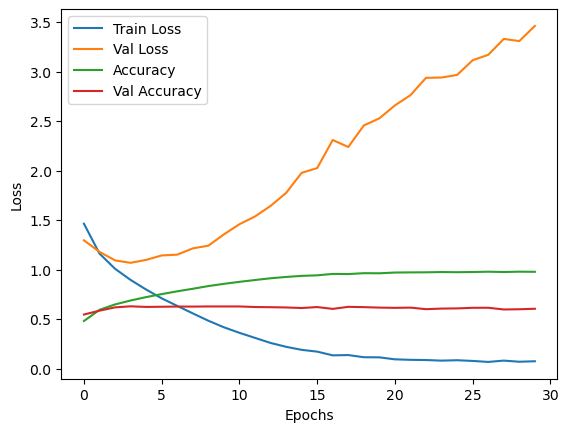

235/235 [==============================] - 1s 2ms/step - loss: 3.4611 - accuracy: 0.6035
Validation Loss: 3.4610891342163086
Validation accuracy: 0.6034666895866394


In [55]:
plot_eval_metrics(history_v1)
evaluate(model_v1)

**Model V1 demonstrates a significant discrepancy between training accuracy (0.9770) and validation accuracy (0.6035) with a high loss of 3.461. This suggests that Model V1 is overfitting to the training data, so we will introduce dropout layers in the next model.**

## Model V2

In [56]:
'''
Model V2 is a continuation of Model V1 with the introduction of dropout layers.
Dropout layer(0.25): randomly sets input units to 0 with a 25% frequency at each step during training, meaning that
there is a 25% chance of the input unit being excluded from the update and forward pass at each training iteration, 
which should help alleviate the overfitting problem.
'''

model_v2 = Sequential()
model_v2.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model_v2.add(MaxPooling2D(pool_size = (2,2)))
model_v2.add(Dropout(0.25))
model_v2.add(Flatten())
model_v2.add(Dense(128, activation ='relu'))
model_v2.add(Dense(10, activation ='softmax'))
model_v2.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

model_v2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten_5 (Flatten)         (None, 6272)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               802944    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                      

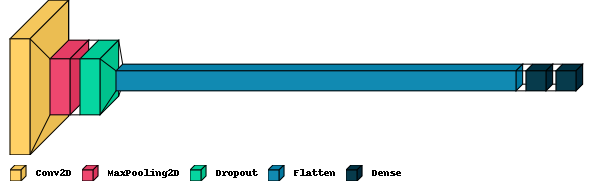

In [57]:
visualkeras.layered_view(model_v2, legend=True)

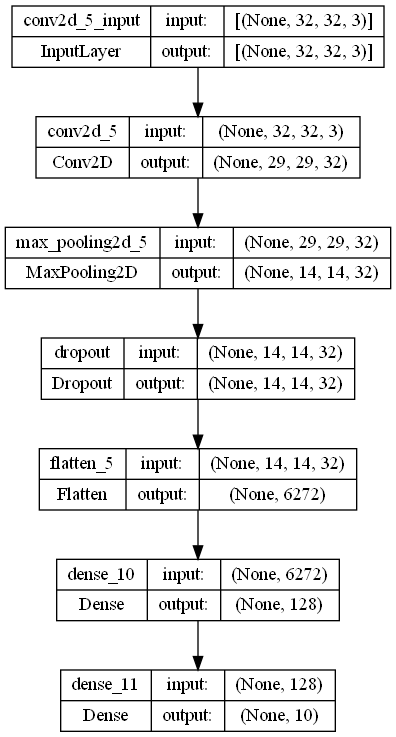

In [58]:
tf.keras.utils.plot_model(model_v2, to_file='model_test.png', show_shapes=True, show_layer_names=True)

In [60]:
history_v2 = model_v2.fit(X_train_normalized, y_train_ohe, epochs = 50, verbose=1, validation_data=(X_val_normalized, y_val_ohe))

Epoch 1/50
1329/1329 [==============================] - 5s 3ms/step - loss: 1.5030 - accuracy: 0.4641 - val_loss: 1.3075 - val_accuracy: 0.5343
Epoch 2/50
1329/1329 [==============================] - 4s 3ms/step - loss: 1.2215 - accuracy: 0.5696 - val_loss: 1.1773 - val_accuracy: 0.5888
Epoch 3/50
1329/1329 [==============================] - 4s 3ms/step - loss: 1.0984 - accuracy: 0.6143 - val_loss: 1.0946 - val_accuracy: 0.6168
Epoch 4/50
1329/1329 [==============================] - 4s 3ms/step - loss: 1.0141 - accuracy: 0.6445 - val_loss: 1.1230 - val_accuracy: 0.6039
Epoch 5/50
1329/1329 [==============================] - 4s 3ms/step - loss: 0.9421 - accuracy: 0.6692 - val_loss: 1.0944 - val_accuracy: 0.6127
Epoch 6/50
1329/1329 [==============================] - 4s 3ms/step - loss: 0.8736 - accuracy: 0.6917 - val_loss: 1.0767 - val_accuracy: 0.6267
Epoch 7/50
1329/1329 [==============================] - 4s 3ms/step - loss: 0.8120 - accuracy: 0.7130 - val_loss: 1.0534 - val_accuracy:

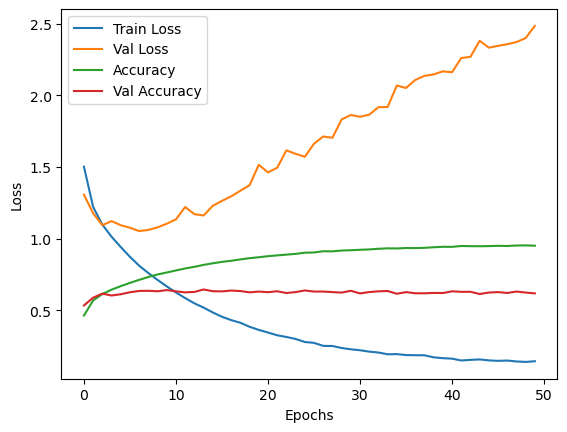

235/235 [==============================] - 1s 3ms/step - loss: 2.4852 - accuracy: 0.6187
Validation Loss: 2.485236883163452
Validation accuracy: 0.6186666488647461


In [61]:
plot_eval_metrics(history_v2)
evaluate(model_v2)

|                    | Training Accuracy | Validation Loss | Validation Accuracy |
|--------------------|-------------------|-----------------|---------------------|
| **Model V1**       | 0.9770            | 3.461           | 0.6035              |
| **Model V2**       | 0.9513            | 2.485           | 0.6187              |


**Model V2 displayed a lower validation loss compared to Model V1. There was also a slight increase in validation accuracy, and the The training accuracy also saw a decrease compared to Model V1. This suggests that the drop out layer reduced overfitting.**

## Model V3

In [65]:
'''
Model V3 builds upon Model V2 by adding additional layers and filters. 
The dense layer dropout rate was also increased to 0.3 to further reduce overfitting.
'''

model_v3 = Sequential()
model_v3.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model_v3.add(MaxPooling2D(pool_size = (2,2)))
model_v3.add(Dropout(0.3))

model_v3.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model_v3.add(MaxPooling2D(pool_size = (2,2)))
model_v3.add(Dropout(0.3))

model_v3.add(Flatten())
model_v3.add(Dense(128, activation ='relu'))
model_v3.add(Dense(10, activation ='softmax'))
model_v3.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

model_v3.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 32)         

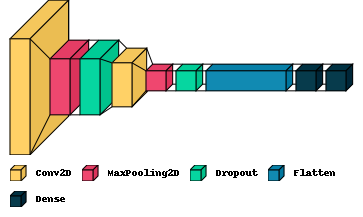

In [66]:
visualkeras.layered_view(model_v3, legend=True)

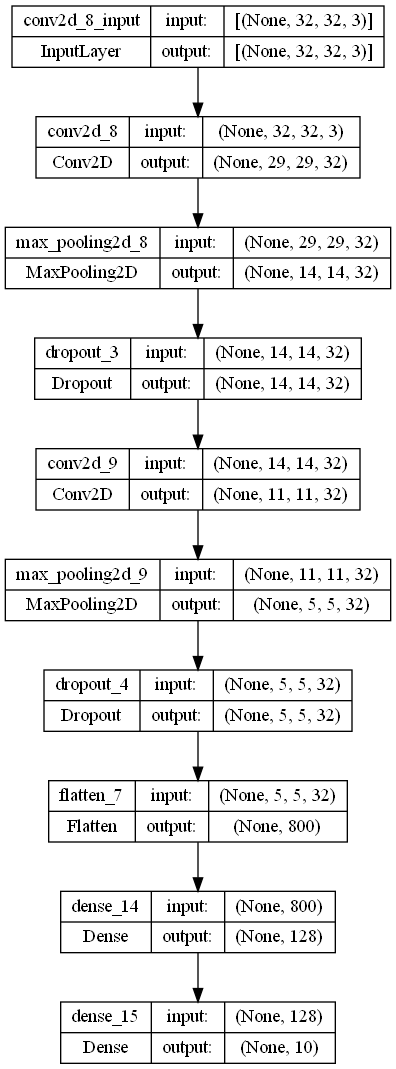

In [67]:
tf.keras.utils.plot_model(model_v3, to_file='model_test.png', show_shapes=True, show_layer_names=True)

In [68]:
history_v3 = model_v3.fit(X_train_normalized, y_train_ohe, epochs = 50, verbose=1, validation_data=(X_val_normalized, y_val_ohe))

Epoch 1/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.6162 - accuracy: 0.4107 - val_loss: 1.3542 - val_accuracy: 0.5139
Epoch 2/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.3399 - accuracy: 0.5196 - val_loss: 1.2688 - val_accuracy: 0.5511
Epoch 3/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.2272 - accuracy: 0.5634 - val_loss: 1.1562 - val_accuracy: 0.6067
Epoch 4/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.1486 - accuracy: 0.5940 - val_loss: 1.0961 - val_accuracy: 0.6205
Epoch 5/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.0880 - accuracy: 0.6130 - val_loss: 1.0332 - val_accuracy: 0.6444
Epoch 6/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.0396 - accuracy: 0.6333 - val_loss: 0.9986 - val_accuracy: 0.6571
Epoch 7/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.0025 - accuracy: 0.6474 - val_loss: 1.0071 - val_accuracy:

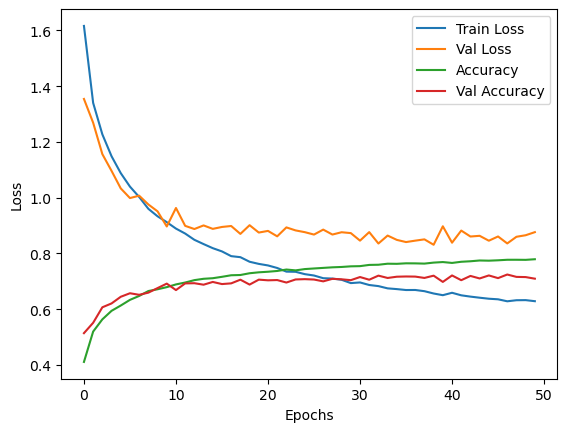

235/235 [==============================] - 1s 3ms/step - loss: 0.8763 - accuracy: 0.7093
Validation Loss: 0.8762681484222412
Validation accuracy: 0.7093333601951599


In [70]:
plot_eval_metrics(history_v3)
evaluate(model_v3)

|                    | Training Accuracy | Validation Loss | Validation Accuracy |
|--------------------|-------------------|-----------------|---------------------|
| **Model V1**       | 0.9770            | 3.461           | 0.6035              |
| **Model V2**       | 0.9513            | 2.485           | 0.6187              |
| **Model V3**       | 0.7791            | 0.8763          | 0.7093              |

**Model V3 showsed an increase in validation accuracy and a decreased training accurracy and validation loss. It was able to capture more complex patterns and features with the additional layers, and reduced the overfitting issue by adding an additional dense layer and increasing the dropout rate.**

## Model V4

In [71]:
'''
Model V4 will evolve by adding another 2D convolutional layer and increasing the number of neurons in the dense layer from 128 to 512.
The goal is to increase the accuracy of the model by capturing more complex patterns and features in the images.
'''

model_v4 = Sequential()
model_v4.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model_v4.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model_v4.add(MaxPooling2D(pool_size = (2,2)))
model_v4.add(Dropout(0.3))

model_v4.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model_v4.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model_v4.add(MaxPooling2D(pool_size = (2,2)))
model_v4.add(Dropout(0.3))

model_v4.add(Flatten())
model_v4.add(Dense(512, activation ='relu'))
model_v4.add(Dense(10, activation ='softmax'))
model_v4.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

model_v4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 29, 29, 32)        1568      
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        16416     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 10, 10, 32)        16416     
                                                                 
 conv2d_13 (Conv2D)          (None, 7, 7, 32)          16416     
                                                      

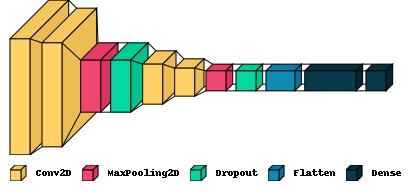

In [72]:
visualkeras.layered_view(model_v4, legend=True)

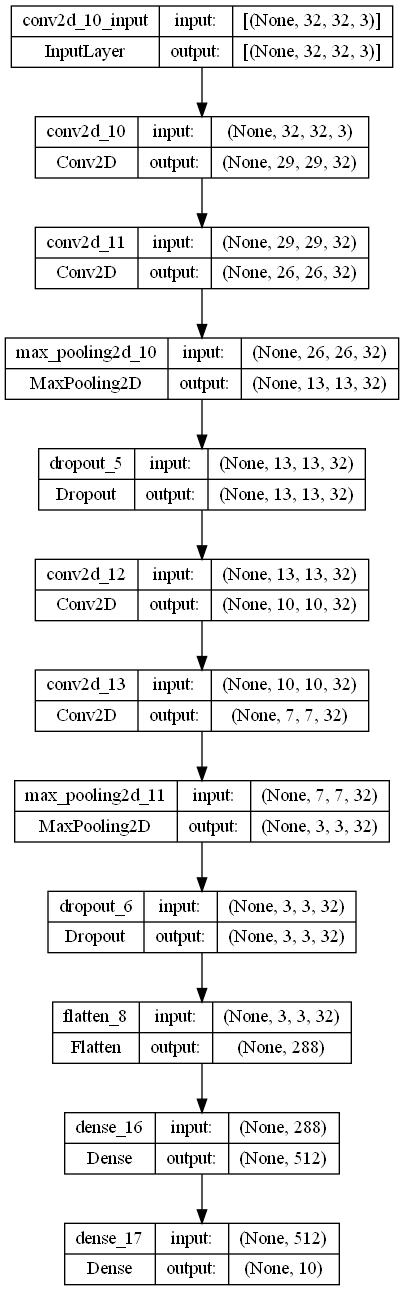

In [73]:
tf.keras.utils.plot_model(model_v4, to_file='model_test.png', show_shapes=True, show_layer_names=True)

In [75]:
history_v4 = model_v4.fit(X_train_normalized, y_train_ohe, epochs = 50, verbose=1, validation_data=(X_val_normalized, y_val_ohe))

Epoch 1/50
1329/1329 [==============================] - 7s 5ms/step - loss: 1.7198 - accuracy: 0.3590 - val_loss: 1.4463 - val_accuracy: 0.4741
Epoch 2/50
1329/1329 [==============================] - 6s 5ms/step - loss: 1.3999 - accuracy: 0.4902 - val_loss: 1.2879 - val_accuracy: 0.5388
Epoch 3/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.2680 - accuracy: 0.5450 - val_loss: 1.2082 - val_accuracy: 0.5700
Epoch 4/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.1845 - accuracy: 0.5760 - val_loss: 1.0834 - val_accuracy: 0.6165
Epoch 5/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.1221 - accuracy: 0.6000 - val_loss: 1.0505 - val_accuracy: 0.6313
Epoch 6/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.0746 - accuracy: 0.6180 - val_loss: 1.0128 - val_accuracy: 0.6473
Epoch 7/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.0344 - accuracy: 0.6334 - val_loss: 0.9864 - val_accuracy:

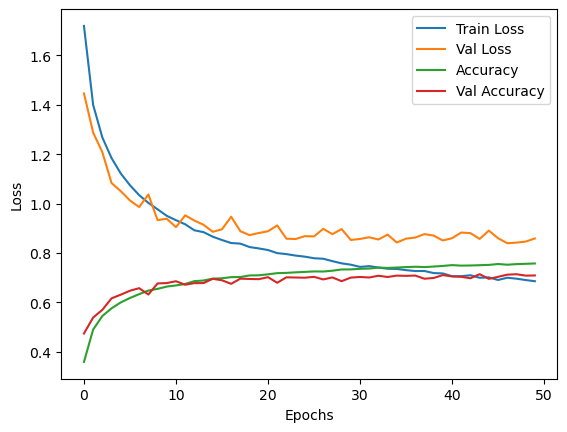

235/235 [==============================] - 1s 2ms/step - loss: 0.8589 - accuracy: 0.7092
Validation Loss: 0.8589420318603516
Validation accuracy: 0.7092000246047974


In [77]:
plot_eval_metrics(history_v4)
evaluate(model_v4)

|                    | Training Accuracy | Validation Loss | Validation Accuracy |
|--------------------|-------------------|-----------------|---------------------|
| **Model V1**       | 0.9770            | 3.461           | 0.6035              |
| **Model V2**       | 0.9513            | 2.485           | 0.6187              |
| **Model V3**       | 0.7791            | 0.8763          | 0.7093              |
| **Model V4**       | 0.7576            | 0.8589          | 0.7092              |

**Model V4 shows a slight decrease in training accuracy and validation loss, while validation accuracy was almost identical.**


## Model V5

In [80]:
'''
Model V5 improves upon Model V4 by introduciton Batch Normalization into the model. It was applied after every 2D convolutional layer
followed by an Activation layer. 
Batch Normalization: normalizes the outputs from the Conv2D layers before applying the ReLU activation function, ensuring that the inputs
to the activation function have a stable distribution. This allows for faster convergence and more efficient performance.
Activation layer: ReLU activation layers ensure that the normalized outputs are passed through a non-linear activation function, allowing for the model
to learn more complex patterns and relationships with data as compared to linear counterparts.

'''

model_v5 = Sequential()
model_v5.add(Conv2D(32, (4,4), input_shape=(32,32,3), use_bias=False))
model_v5.add(BatchNormalization())
model_v5.add(Activation('relu'))
model_v5.add(Conv2D(32, (4,4), use_bias=False))
model_v5.add(BatchNormalization())
model_v5.add(Activation('relu'))
model_v5.add(MaxPooling2D(pool_size=(2,2)))
model_v5.add(Dropout(0.3))

model_v5.add(Conv2D(32, (4,4), use_bias=False))
model_v5.add(BatchNormalization())
model_v5.add(Activation('relu'))
model_v5.add(Conv2D(32, (4,4), use_bias=False))
model_v5.add(BatchNormalization())
model_v5.add(Activation('relu'))
model_v5.add(MaxPooling2D(pool_size=(2,2)))
model_v5.add(Dropout(0.3))

model_v5.add(Flatten())
model_v5.add(Dense(512, activation='relu'))
model_v5.add(Dense(10, activation='softmax'))
model_v5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_v5.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 29, 29, 32)        1536      
                                                                 
 batch_normalization_4 (Batc  (None, 29, 29, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 29, 29, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 26, 26, 32)        16384     
                                                                 
 batch_normalization_5 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 26, 26, 32)       

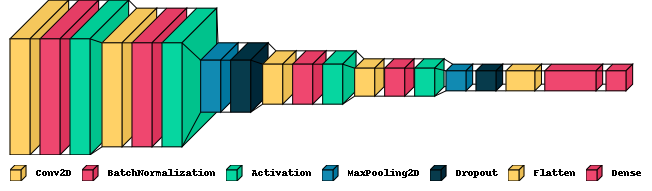

In [81]:
visualkeras.layered_view(model_v5, legend=True)

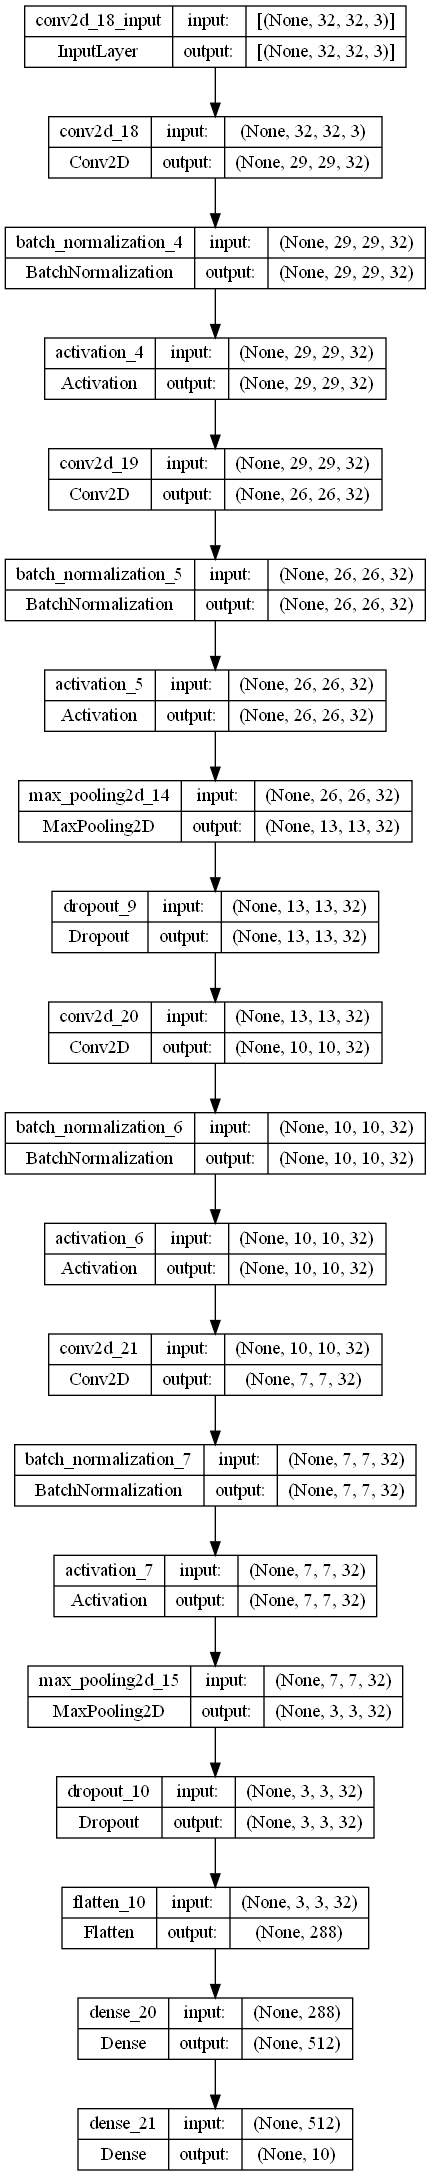

In [82]:
tf.keras.utils.plot_model(model_v5, to_file='model_test.png', show_shapes=True, show_layer_names=True)

In [83]:
%%time
history_v5 = model_v5.fit(X_train_normalized, y_train_ohe, epochs = 50, verbose=1, validation_data=(X_val_normalized, y_val_ohe))

Epoch 1/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.5614 - accuracy: 0.4284 - val_loss: 1.3127 - val_accuracy: 0.5296
Epoch 2/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.2229 - accuracy: 0.5627 - val_loss: 1.3690 - val_accuracy: 0.5259
Epoch 3/50
1329/1329 [==============================] - 6s 5ms/step - loss: 1.0901 - accuracy: 0.6127 - val_loss: 1.1261 - val_accuracy: 0.6088
Epoch 4/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.0071 - accuracy: 0.6420 - val_loss: 0.9637 - val_accuracy: 0.6619
Epoch 5/50
1329/1329 [==============================] - 6s 4ms/step - loss: 0.9470 - accuracy: 0.6640 - val_loss: 0.9355 - val_accuracy: 0.6689
Epoch 6/50
1329/1329 [==============================] - 7s 5ms/step - loss: 0.9045 - accuracy: 0.6811 - val_loss: 1.0100 - val_accuracy: 0.6464
Epoch 7/50
1329/1329 [==============================] - 6s 5ms/step - loss: 0.8654 - accuracy: 0.6963 - val_loss: 0.8356 - val_accuracy:

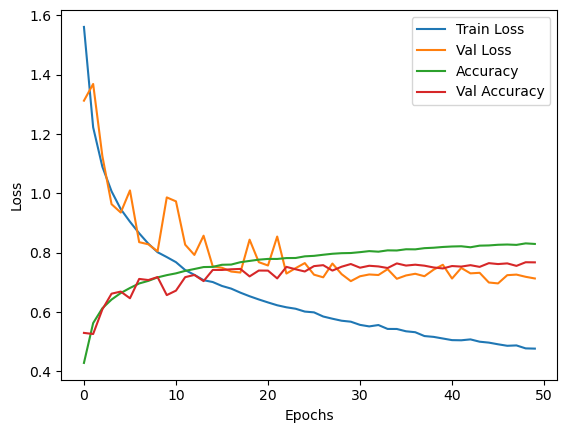

235/235 [==============================] - 1s 3ms/step - loss: 0.7131 - accuracy: 0.7675
Validation Loss: 0.7131242752075195
Validation accuracy: 0.76746666431427


In [84]:
plot_eval_metrics(history_v5)
evaluate(model_v5)

|                    | Training Accuracy | Validation Loss | Validation Accuracy |
|--------------------|-------------------|-----------------|---------------------|
| **Model V1**       | 0.9770            | 3.461           | 0.6035              |
| **Model V2**       | 0.9513            | 2.485           | 0.6187              |
| **Model V3**       | 0.7791            | 0.8763          | 0.7093              |
| **Model V4**       | 0.7576            | 0.8589          | 0.7092              |
| **Model V5**       | 0.8296            | 0.7131          | 0.7675              |

**Model V5 accuracy increased in both training and validation, and valiation loss also decreased. The addition of batch normalization and activation layers had a positive impact on the performance of the model.**

## Model V6

In [17]:
'''
Model V6 builds upon Model V5 by adding an additional convolution, pooling, activation, and dropout layers. A dropout layer was also
addded right before the final dense layer to further reduce regularization.
'''

model_v6 = Sequential()
model_v6.add(Conv2D(64,(4,4),input_shape=(32,32,3),padding='same')) # increase filter ocunt to 64
model_v6.add(BatchNormalization())
model_v6.add(Activation('relu'))
model_v6.add(Conv2D(64,(4,4),input_shape=(32,32,3),padding='same'))
model_v6.add(BatchNormalization())
model_v6.add(Activation('relu'))
model_v6.add(MaxPooling2D(pool_size=(2,2)))
model_v6.add(Dropout(0.3))

model_v6.add(Conv2D(64,(4,4),input_shape=(32,32,3),padding='same'))
model_v6.add(BatchNormalization())
model_v6.add(Activation('relu'))
model_v6.add(Conv2D(64,(4,4),input_shape=(32,32,3),padding='same'))
model_v6.add(BatchNormalization())
model_v6.add(Activation('relu'))
model_v6.add(MaxPooling2D(pool_size=(2,2)))
model_v6.add(Dropout(0.3))

model_v6.add(Conv2D(64,(4,4),input_shape=(32,32,3),padding='same'))
model_v6.add(BatchNormalization())
model_v6.add(Activation('relu'))
model_v6.add(Conv2D(64,(4,4),input_shape=(32,32,3),padding='same'))
model_v6.add(BatchNormalization())
model_v6.add(Activation('relu'))
model_v6.add(MaxPooling2D(pool_size=(2,2)))
model_v6.add(Dropout(0.3))

model_v6.add(Flatten())
model_v6.add(Dense(512, activation='relu'))
model_v6.add(BatchNormalization())
model_v6.add(Activation('relu'))
model_v6.add(Dropout(0.3))
model_v6.add(Dense(10, activation='softmax'))
model_v6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_v6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 32, 32, 64)       

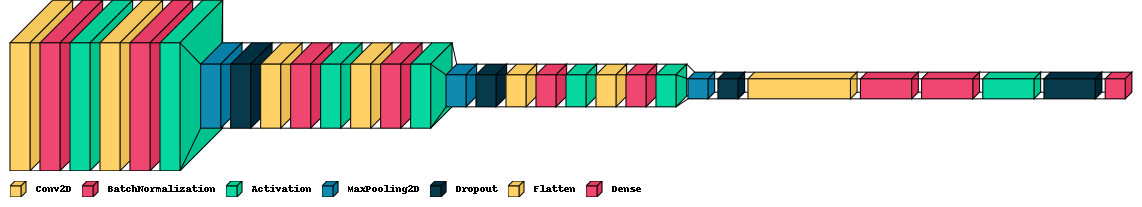

In [18]:
visualkeras.layered_view(model_v6, legend=True)

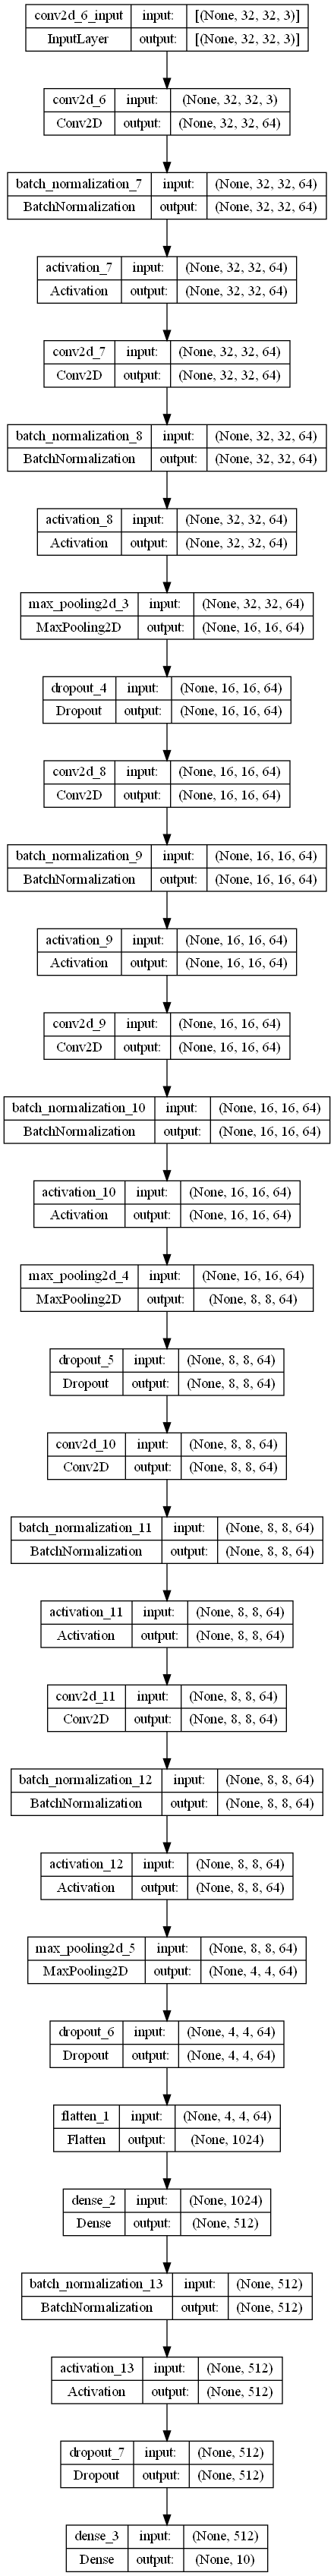

In [19]:
tf.keras.utils.plot_model(model_v6, to_file='model_test.png', show_shapes=True, show_layer_names=True)

In [20]:
%%time
history_v6 = model_v6.fit(X_train_normalized, y_train_ohe, epochs = 50, verbose=1, validation_data=(X_val_normalized, y_val_ohe))

Epoch 1/50
1329/1329 [==============================] - 12s 8ms/step - loss: 1.5536 - accuracy: 0.4434 - val_loss: 1.7617 - val_accuracy: 0.4495
Epoch 2/50
1329/1329 [==============================] - 11s 8ms/step - loss: 1.0490 - accuracy: 0.6273 - val_loss: 1.1340 - val_accuracy: 0.6056
Epoch 3/50
1329/1329 [==============================] - 11s 8ms/step - loss: 0.8768 - accuracy: 0.6927 - val_loss: 1.0899 - val_accuracy: 0.6308
Epoch 4/50
1329/1329 [==============================] - 11s 8ms/step - loss: 0.7820 - accuracy: 0.7279 - val_loss: 0.7754 - val_accuracy: 0.7319
Epoch 5/50
1329/1329 [==============================] - 11s 8ms/step - loss: 0.7046 - accuracy: 0.7554 - val_loss: 0.6685 - val_accuracy: 0.7701
Epoch 6/50
1329/1329 [==============================] - 11s 8ms/step - loss: 0.6593 - accuracy: 0.7712 - val_loss: 0.6421 - val_accuracy: 0.7747
Epoch 7/50
1329/1329 [==============================] - 10s 8ms/step - loss: 0.5981 - accuracy: 0.7919 - val_loss: 0.7814 - val_ac

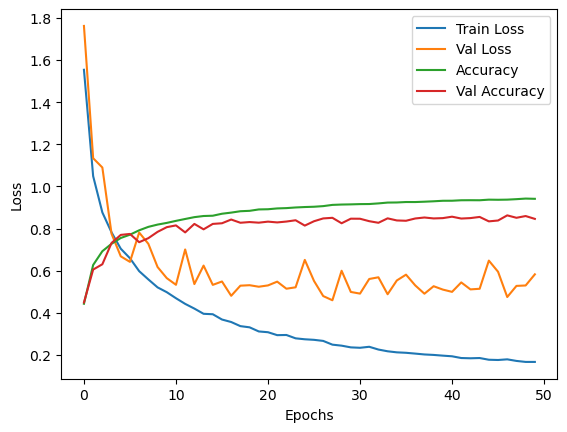

235/235 [==============================] - 1s 4ms/step - loss: 0.5830 - accuracy: 0.8461
Validation Loss: 0.5830202102661133
Validation accuracy: 0.8461333513259888


In [21]:
plot_eval_metrics(history_v6)
evaluate(model_v6)

|                    | Training Accuracy | Validation Loss | Validation Accuracy |
|--------------------|-------------------|-----------------|---------------------|
| **Model V1**       | 0.9770            | 3.461           | 0.6035              |
| **Model V2**       | 0.9513            | 2.485           | 0.6187              |
| **Model V3**       | 0.7791            | 0.8763          | 0.7093              |
| **Model V4**       | 0.7576            | 0.8589          | 0.7092              |
| **Model V5**       | 0.8296            | 0.7131          | 0.7675              |
| **Model V6**       | 0.9413            | 0.5830          | 0.8461              |

**Model V6 accuracy increased in both training and validation, and valiation loss also decreased. The addition of additional layers had a positive impact on the performance of the model. However, the discrepancy between the training accuracy and validation accuracy suggests that the model is currently overfitting.**

## Model V7

In [26]:
'''
Model V7 is almost identical to Model V6 but the dropout rates were increased to 0.4 and 0.5 for the last layer. The first dense layer also
the number of neurons reduced to 256 from 512 to attempt to reduce overfitting.
'''

model_v7 = Sequential()
model_v7.add(Conv2D(64,(4,4),input_shape=(32,32,3),padding='same')) # increase filter count
model_v7.add(BatchNormalization())
model_v7.add(Activation('relu'))
model_v7.add(Conv2D(64,(4,4),input_shape=(32,32,3),padding='same'))
model_v7.add(BatchNormalization())
model_v7.add(Activation('relu'))
model_v7.add(MaxPooling2D(pool_size=(2,2)))
model_v7.add(Dropout(0.4))

model_v7.add(Conv2D(64,(4,4),input_shape=(32,32,3),padding='same'))
model_v7.add(BatchNormalization())
model_v7.add(Activation('relu'))
model_v7.add(Conv2D(64,(4,4),input_shape=(32,32,3),padding='same'))
model_v7.add(BatchNormalization())
model_v7.add(Activation('relu'))
model_v7.add(MaxPooling2D(pool_size=(2,2)))
model_v7.add(Dropout(0.4))

model_v7.add(Conv2D(64,(4,4),input_shape=(32,32,3),padding='same'))
model_v7.add(BatchNormalization())
model_v7.add(Activation('relu'))
model_v7.add(Conv2D(64,(4,4),input_shape=(32,32,3),padding='same'))
model_v7.add(BatchNormalization())
model_v7.add(Activation('relu'))
model_v7.add(MaxPooling2D(pool_size=(2,2)))
model_v7.add(Dropout(0.4))

model_v7.add(Flatten())
model_v7.add(Dense(258, activation='relu'))
model_v7.add(BatchNormalization())
model_v7.add(Activation('relu'))
model_v7.add(Dropout(0.5))
model_v7.add(Dense(10, activation='softmax'))
model_v7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_v7.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization_21 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 activation_21 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_22 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 activation_22 (Activation)  (None, 32, 32, 64)       

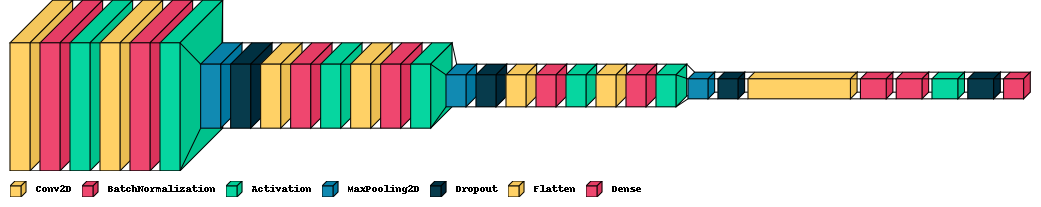

In [27]:
visualkeras.layered_view(model_v7, legend=True)

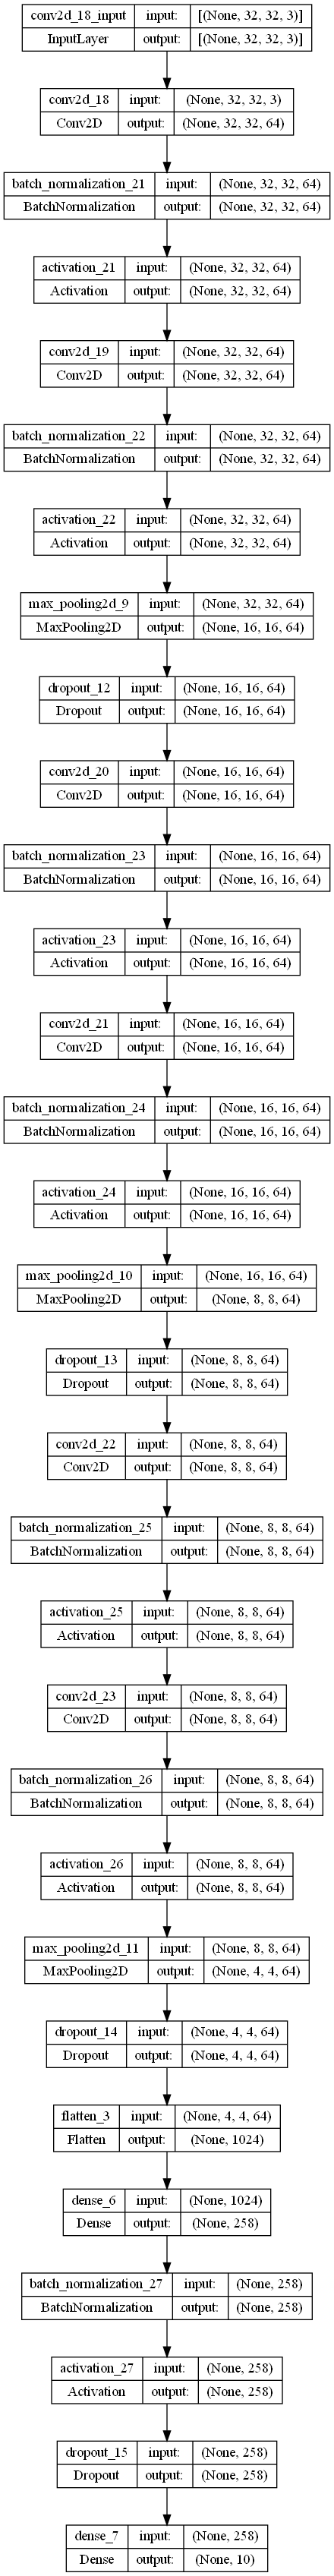

In [28]:
tf.keras.utils.plot_model(model_v7, to_file='model_test.png', show_shapes=True, show_layer_names=True)

In [29]:
%%time
history_v7 = model_v7.fit(X_train_normalized, y_train_ohe, epochs = 50, verbose=1, validation_data=(X_val_normalized, y_val_ohe))

Epoch 1/50
1329/1329 [==============================] - 12s 8ms/step - loss: 1.7057 - accuracy: 0.3883 - val_loss: 1.3900 - val_accuracy: 0.4920
Epoch 2/50
1329/1329 [==============================] - 11s 8ms/step - loss: 1.1880 - accuracy: 0.5740 - val_loss: 0.9881 - val_accuracy: 0.6493
Epoch 3/50
1329/1329 [==============================] - 10s 8ms/step - loss: 0.9938 - accuracy: 0.6498 - val_loss: 1.0252 - val_accuracy: 0.6451
Epoch 4/50
1329/1329 [==============================] - 11s 8ms/step - loss: 0.8879 - accuracy: 0.6934 - val_loss: 0.8473 - val_accuracy: 0.7024
Epoch 5/50
1329/1329 [==============================] - 10s 8ms/step - loss: 0.8114 - accuracy: 0.7196 - val_loss: 0.6977 - val_accuracy: 0.7548
Epoch 6/50
1329/1329 [==============================] - 10s 8ms/step - loss: 0.7554 - accuracy: 0.7414 - val_loss: 1.1463 - val_accuracy: 0.6164
Epoch 7/50
1329/1329 [==============================] - 10s 8ms/step - loss: 0.7061 - accuracy: 0.7579 - val_loss: 0.9332 - val_ac

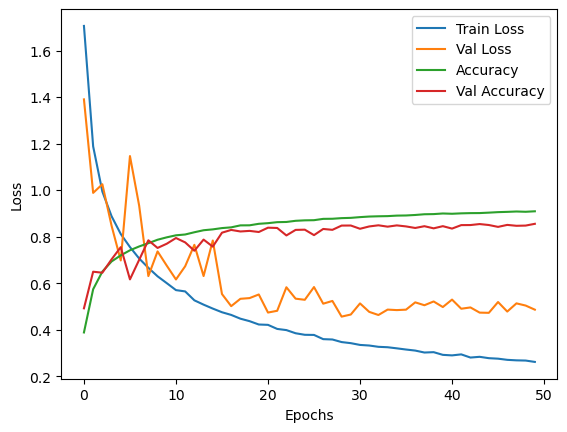

235/235 [==============================] - 1s 4ms/step - loss: 0.4862 - accuracy: 0.8552
Validation Loss: 0.48616525530815125
Validation accuracy: 0.8551999926567078


In [30]:
plot_eval_metrics(history_v7)
evaluate(model_v7)

|                    | Training Accuracy | Validation Loss | Validation Accuracy |
|--------------------|-------------------|-----------------|---------------------|
| **Model V1**       | 0.9770            | 3.461           | 0.6035              |
| **Model V2**       | 0.9513            | 2.485           | 0.6187              |
| **Model V3**       | 0.7791            | 0.8763          | 0.7093              |
| **Model V4**       | 0.7576            | 0.8589          | 0.7092              |
| **Model V5**       | 0.8296            | 0.7131          | 0.7675              |
| **Model V6**       | 0.9413            | 0.5830          | 0.8461              |
| **Model V7**       | 0.9090            | 0.4862          | 0.8552              |

**Model V7 accuracy gap between the training and validation data can be seen to decrease. The validation loss was also lower in comparison to Model V6. This suggests that increasing the dropout rate in the dropout layers and decreasing the number of neurons in the dense layer improved the model.**

## Model V8

In [23]:
'''
Model V8 is identical to Model V7 with the addition of L2 regularization.
'''

# Hyperparameter for L2 regularization
lambda_val = 0.01

model_v8 = Sequential()
model_v8.add(Conv2D(64, (4, 4), input_shape=(32, 32, 3), padding='same'))
model_v8.add(BatchNormalization())
model_v8.add(Activation('relu'))
model_v8.add(Conv2D(64, (4, 4), padding='same'))
model_v8.add(BatchNormalization())
model_v8.add(Activation('relu'))
model_v8.add(MaxPooling2D(pool_size=(2, 2)))
model_v8.add(Dropout(0.4))

model_v8.add(Conv2D(64, (4, 4), padding='same'))
model_v8.add(BatchNormalization())
model_v8.add(Activation('relu'))
model_v8.add(Conv2D(64, (4, 4), padding='same'))
model_v8.add(BatchNormalization())
model_v8.add(Activation('relu'))
model_v8.add(MaxPooling2D(pool_size=(2, 2)))
model_v8.add(Dropout(0.4))

model_v8.add(Conv2D(64, (4, 4), padding='same'))
model_v8.add(BatchNormalization())
model_v8.add(Activation('relu'))
model_v8.add(Conv2D(64, (4, 4), padding='same'))
model_v8.add(BatchNormalization())
model_v8.add(Activation('relu'))
model_v8.add(MaxPooling2D(pool_size=(2, 2)))
model_v8.add(Dropout(0.4))

model_v8.add(Flatten())
model_v8.add(Dense(258, activation='relu', kernel_regularizer=l2(lambda_val)))
model_v8.add(BatchNormalization())
model_v8.add(Activation('relu'))
model_v8.add(Dropout(0.5))
model_v8.add(Dense(10, activation='softmax'))
model_v8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_v8.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization_21 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 activation_21 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_22 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 activation_22 (Activation)  (None, 32, 32, 64)       

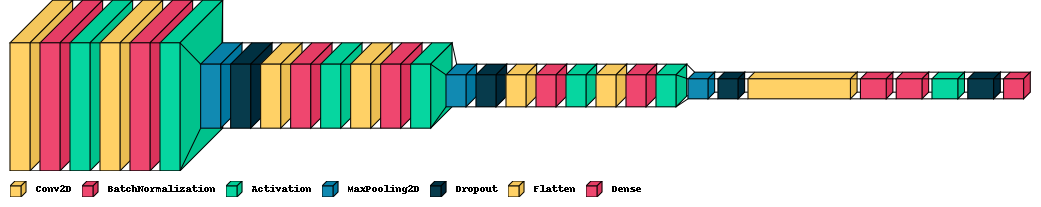

In [24]:
visualkeras.layered_view(model_v8, legend=True)

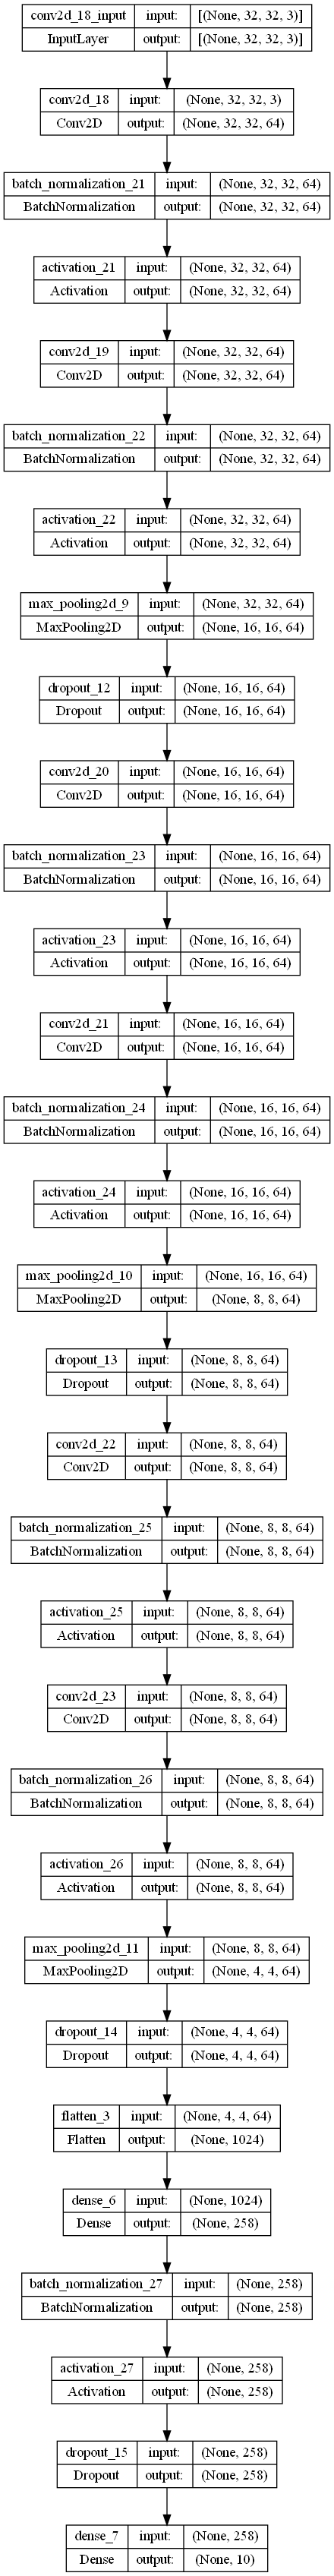

In [25]:
tf.keras.utils.plot_model(model_v8, to_file='model_test.png', show_shapes=True, show_layer_names=True)

In [26]:
%%time
history_v8 = model_v8.fit(X_train_normalized, y_train_ohe, epochs = 50, verbose=1, validation_data=(X_val_normalized, y_val_ohe))
model_v8.save('model_v8.h5')

Epoch 1/50
1329/1329 [==============================] - 12s 8ms/step - loss: 2.7777 - accuracy: 0.3984 - val_loss: 1.7343 - val_accuracy: 0.4979
Epoch 2/50
1329/1329 [==============================] - 10s 8ms/step - loss: 1.5604 - accuracy: 0.5617 - val_loss: 1.3408 - val_accuracy: 0.6315
Epoch 3/50
1329/1329 [==============================] - 10s 8ms/step - loss: 1.3888 - accuracy: 0.6288 - val_loss: 2.7873 - val_accuracy: 0.3307
Epoch 4/50
1329/1329 [==============================] - 11s 8ms/step - loss: 1.2921 - accuracy: 0.6667 - val_loss: 1.1310 - val_accuracy: 0.7195
Epoch 5/50
1329/1329 [==============================] - 10s 8ms/step - loss: 1.2128 - accuracy: 0.6973 - val_loss: 1.4338 - val_accuracy: 0.6177
Epoch 6/50
1329/1329 [==============================] - 10s 8ms/step - loss: 1.1507 - accuracy: 0.7205 - val_loss: 1.0494 - val_accuracy: 0.7408
Epoch 7/50
1329/1329 [==============================] - 10s 8ms/step - loss: 1.0987 - accuracy: 0.7373 - val_loss: 1.2889 - val_ac

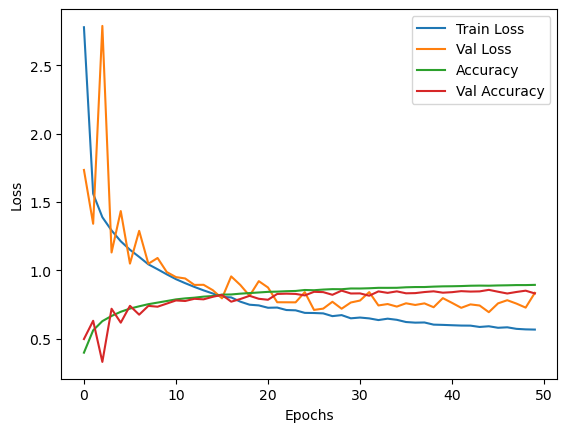

235/235 [==============================] - 1s 3ms/step - loss: 0.8359 - accuracy: 0.8313
Validation Loss: 0.835913896560669
Validation accuracy: 0.831333339214325


In [27]:
plot_eval_metrics(history_v8)
evaluate(model_v8)

|                    | Training Accuracy | Validation Loss | Validation Accuracy |
|--------------------|-------------------|-----------------|---------------------|
| **Model V1**       | 0.9770            | 3.461           | 0.6035              |
| **Model V2**       | 0.9513            | 2.485           | 0.6187              |
| **Model V3**       | 0.7791            | 0.8763          | 0.7093              |
| **Model V4**       | 0.7576            | 0.8589          | 0.7092              |
| **Model V5**       | 0.8296            | 0.7131          | 0.7675              |
| **Model V6**       | 0.9413            | 0.5830          | 0.8461              |
| **Model V7**       | 0.9090            | 0.4862          | 0.8552              |
| **Model V8**       | 0.8940            | 0.8359          | 0.8313              |

**The introduction in L2 regularization in the first fully connected layer in Model V8 resulted in a slight decrease in training accuracy. However, there was an increase in validation loss compared to Model V7.**

# Results and Predictions
### Note: Model V7 will be used for evaluating the test set

In [32]:
test_eval = model_v7.evaluate(X_test_normalized, y_test_ohe)
print(f'Test Loss: {test_eval[0]}') # Categorical cross-entropy loss measures distance between model's predicted probabilities and actual distribution for each sample
print(f'Test accuracy: {test_eval[1]}') # Number of correct predictions divided by total number of predictions as a percentage

313/313 [==============================] - 1s 4ms/step - loss: 0.4845 - accuracy: 0.8558
Test Loss: 0.4844541847705841
Test accuracy: 0.8557999730110168


**It can be seen that there is a test accuracy of 0.8558 and a test loss of 0.4844**

In [33]:
pred_v7 = model_v7.predict(X_test_normalized)
pred_v7.shape

313/313 [==============================] - 1s 3ms/step


(10000, 10)

In [35]:
# Get the predicted classes and correspeonding confidence values for each prediction
pred_v7_classes = np.argmax(pred_v7, axis=1)
pred_v7_conf = np.max(pred_v7, axis=1)

In [37]:
y_test_flattened = y_test.flatten()
pred_v7_df = pd.DataFrame({'True_Label':y_test_flattened, 'Predicted_Class': pred_v7_classes, 'Predicted_Confidence': pred_v7_conf})

In [39]:
pred_v7_df

,True_Label,Predicted_Class,Predicted_Confidence
0,3,3,0.954325
1,8,8,0.963840
2,8,8,0.982070
3,0,8,0.753793
4,6,6,0.999573
...,...,...,...
9995,8,0,0.471931
9996,3,3,0.904120
9997,5,5,0.999921
9998,1,1,0.993877


## Correct Predictions

In [40]:
correct_pred_v7 = pred_v7_df[pred_v7_df['True_Label'] == pred_v7_df['Predicted_Class']]
correct_pred_v7

,True_Label,Predicted_Class,Predicted_Confidence
0,3,3,0.954325
1,8,8,0.963840
2,8,8,0.982070
4,6,6,0.999573
5,6,6,0.995989
...,...,...,...
9994,3,3,0.996969
9996,3,3,0.904120
9997,5,5,0.999921
9998,1,1,0.993877


In [41]:
sample_correct_pred_v7 = correct_pred_v7.sample(n=2, random_state=25)
sample_correct_pred_v7

,True_Label,Predicted_Class,Predicted_Confidence
8179,4,4,0.999999
1146,2,2,0.982020


In [42]:
def display_prediction(row):
    print(f"Image of: {label_names[int(row['True_Label'])]}")
    print(f"Predicted class: {label_names[int(row['Predicted_Class'])]}")
    print(f"Predicted confidence: {row['Predicted_Confidence']}")
    plt.figure()
    plt.imshow(X_test[row.name])
    plt.show()

Image of: deer
Predicted class: deer
Predicted confidence: 0.9999991655349731


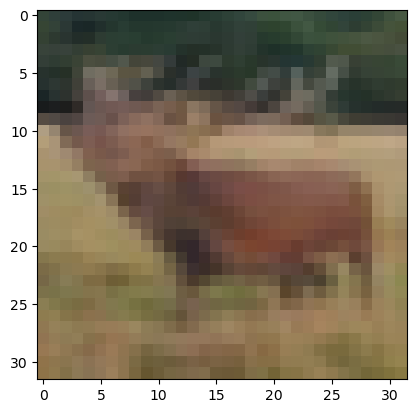

Image of: bird
Predicted class: bird
Predicted confidence: 0.9820201992988586


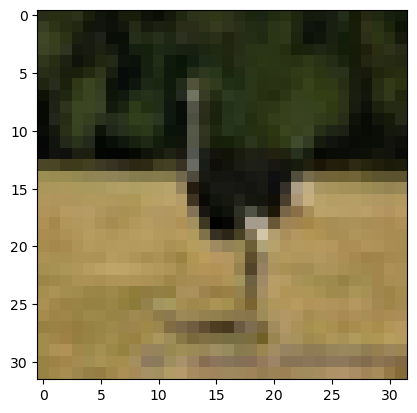

In [44]:
for _, row in sample_correct_pred_v7.iterrows():
    display_prediction(row)

## Incorrect Predictions

In [45]:
incorrect_pred_v7 = pred_v7_df[pred_v7_df['True_Label'] != pred_v7_df['Predicted_Class']]
incorrect_pred_v7

,True_Label,Predicted_Class,Predicted_Confidence
3,0,8,0.753793
9,1,9,0.843985
35,2,3,0.328751
37,1,9,0.953446
52,0,7,0.434128
...,...,...,...
9981,4,7,0.979640
9982,2,6,0.986066
9983,0,1,0.526967
9989,2,4,0.883625


In [49]:
sample_incorrect_pred_v7 = incorrect_pred_v7.sample(n=2, random_state=23)
sample_incorrect_pred_v7

,True_Label,Predicted_Class,Predicted_Confidence
8212,5,6,0.826141
9467,2,7,0.982368


In [50]:
def display_prediction(row):
    print(f"Image of: {label_names[int(row['True_Label'])]}")
    print(f"Predicted class: {label_names[int(row['Predicted_Class'])]}")
    print(f"Predicted confidence: {row['Predicted_Confidence']}")
    plt.figure()
    plt.imshow(X_test[row.name])
    plt.show()


Image of: dog
Predicted class: frog
Predicted confidence: 0.8261409401893616


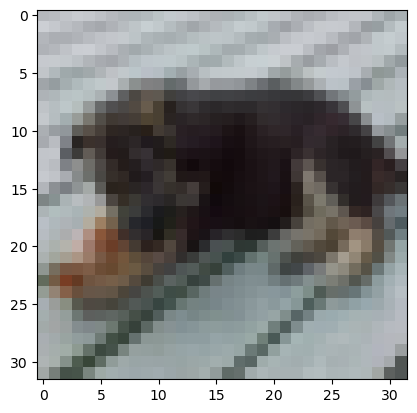

Image of: bird
Predicted class: horse
Predicted confidence: 0.9823678731918335


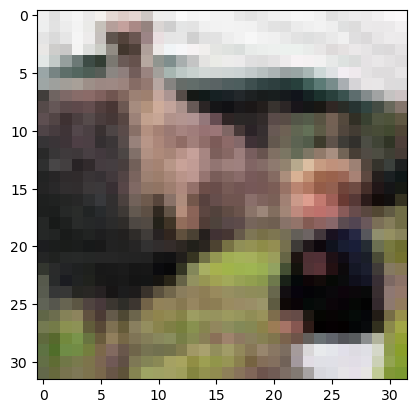

In [51]:
for _, row in sample_incorrect_pred_v7.iterrows():
    display_prediction(row)